<a href="https://colab.research.google.com/github/Mamadyc/Diff-rents-projets-R-Python/blob/main/Copie_propre_D%C3%A9fi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEFI 1 : **Bactériemies**

**1) Data management de notre jeux de donnée
**

In [ ]:
## bibliothèques utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

##Chargement de la base de donnée Bactériemie/cahier de variables
df= pd.read_csv("/content/bacteriemie.csv.gz")


on a commencé à importer les librairies nécessaires qui va nous servir dans les différentes étapes d'analyse de notre base de donnée .
Après on a chargé la base de donnée bactériémies

Exploration des données df (Bactériémies)
on peut voir dans notre base de donnée qu'on a ## [11753 rows x 53 columns], les colonnes de types int64,float64 et de type objet.

In [ ]:
df.head()
df.info()
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11753 non-null  int64  
 1   SEX           11753 non-null  int64  
 2   AGE           11753 non-null  int64  
 3   MCV           11716 non-null  float64
 4   HGB           11716 non-null  float64
 5   HCT           11716 non-null  float64
 6   PLT           11715 non-null  float64
 7   MCH           11716 non-null  float64
 8   MCHC          11716 non-null  float64
 9   RDW           11702 non-null  float64
 10  MPV           11188 non-null  float64
 11  LYM           11541 non-null  float64
 12  MONO          11559 non-null  float64
 13  EOS           11639 non-null  float64
 14  BASO          11632 non-null  float64
 15  NT            9774 non-null   float64
 16  APTT          9701 non-null   float64
 17  FIB           9688 non-null   float64
 18  SODIUM        10711 non-nu

Ce code nous permet de voir si on a des valeurs manquantes dans chaque colonne et là on peut voir carrément que les  3 prémières colonnes ID,SEX,AGE n'ont pas de valeurs manquantes,mais les autres contiennent des valeurs manquantes sauf la dernière colonne (BloodCulture       0)  c'est normal car elle contient uniquements les yes ou no qu'on devra remplacé après par les 0 et 1 pour la suite.


In [ ]:
#vérification  des valeurs manquantes
valeur_manquantes= df.apply(lambda x: x.isnull().sum())

# le nombre de valeurs manquantes dans chaque colonne
print("Nombre de valeurs manquantes dans chaque colonne :")
print(valeur_manquantes)

Nombre de valeurs manquantes dans chaque colonne :
ID                 0
SEX                0
AGE                0
MCV               37
HGB               37
HCT               37
PLT               38
MCH               37
MCHC              37
RDW               51
MPV              565
LYM              212
MONO             194
EOS              114
BASO             121
NT              1979
APTT            2052
FIB             2065
SODIUM          1042
POTASS          1606
CA              1029
PHOS             997
MG              1513
CREA             124
BUN              136
HS              2468
GBIL            1151
TP              1282
ALB             1343
AMY             3102
PAMY            5647
LIP             2925
CHE             1974
AP              1125
ASAT             920
ALAT             788
GGT             1010
LDH             1358
CK              1661
GLU             3361
TRIG            4053
CHOL            4039
CRP              122
BASOR            592
EOSR             592
LYMR

Comme l'indiqué dans l'étape précedente on va remplacer le contenu de notre colonne cible( BloodCulture ) yes ou no par des 0 et 1. pour mieux faire notre prédiction (no=0 & yes=1)

In [ ]:
# Remplacement des valeurs 'no' et 'yes' dans la dernière colonne
df['BloodCulture'] = df['BloodCulture'].replace({'no': 0, 'yes': 1})

# Afficher le DataFrame après le remplacement
print("DataFrame après le remplacement des valeurs dans 'BloodCulture' :")
print(df)

DataFrame après le remplacement des valeurs dans 'BloodCulture' :
          ID  SEX  AGE    MCV   HGB   HCT    PLT   MCH  MCHC   RDW  ...  \
0          1    2   62   99.3  11.5  35.9  307.0  31.5  31.8  19.5  ...   
1          3    1   72   85.1  10.3  34.7  182.0  26.0  30.6  15.0  ...   
2          5    1   46   96.3   7.4  22.8   64.0  31.2  32.4  19.7  ...   
3          9    2   38   85.1  13.7  38.7  183.0  30.2  35.3  12.6  ...   
4         10    1   68  104.5  15.7  46.9  144.0  34.8  33.5  13.9  ...   
...      ...  ...  ...    ...   ...   ...    ...   ...   ...   ...  ...   
11748  62432    1   37   82.0   9.0  25.9  145.0  28.6  34.6  16.4  ...   
11749  62436    2   44   97.4   7.9  22.5  248.0  33.6  34.4  13.3  ...   
11750  62438    1   23   67.4  11.5  38.2   58.0  20.1  29.8  18.4  ...   
11751  62446    1   79   86.3   9.7  31.4  345.0  26.8  30.8  14.4  ...   
11752  62454    1   81   88.6  11.5  32.6  262.0  31.0  35.0  16.4  ...   

          BASOR      EOSR       L

<ipython-input-5-ede07d287a1c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BloodCulture'] = df['BloodCulture'].replace({'no': 0, 'yes': 1})


Après le remplacement on peut voir que notre colonne cible (BloodCulture) contient que des 0 et 1
Valeurs uniques dans 'BloodCulture' :
[0 1]
Comptage des valeurs 0 et 1 dans 'BloodCulture' :

0   (10809)

1   (944)

In [ ]:
# Afficher les valeurs dans la colonne 'BloodCulture'
unique_values = df['BloodCulture'].unique()
print("Valeurs uniques dans 'BloodCulture' :")
print(unique_values)

# Afficher le compte des valeurs 0 et 1 dans 'BloodCulture'
value_counts = df['BloodCulture'].value_counts()
print("Comptage des valeurs 0 et 1 dans 'BloodCulture' :")
print(value_counts)

Valeurs uniques dans 'BloodCulture' :
[0 1]
Comptage des valeurs 0 et 1 dans 'BloodCulture' :
BloodCulture
0    10809
1      944
Name: count, dtype: int64


# Traitement des valeurs manquantes

Aprés traitement on a plus de valeurs manquantes c'est bien

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Vérifier les colonnes avec des valeurs non numériques
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Supprimer les colonnes non numériques et les colonnes avec toutes les valeurs manquantes
df_numeric = df.drop(columns=non_numeric_columns).dropna(axis=1, how='all')

# Imputation des valeurs manquantes dans les colonnes numériques
imputer = SimpleImputer(strategy='mean')  # Imputation des valeurs manquantes par la moyenne
data_imputed = imputer.fit_transform(df_numeric)

# Création d'un nouveau DataFrame avec les données imputées pour les colonnes numériques
df_numeric = pd.DataFrame(data_imputed, columns=df_numeric.columns)

# Réintégrer les colonnes non numériques (en utilisant l'index d'origine)
df_numeric = df_numeric.join(df[non_numeric_columns], how='left')

# Vérification des valeurs manquantes après l'imputation
valeurs_manquantes_apres = df_numeric.apply(lambda x: x.isnull().sum())

print("\nNombre de valeurs manquantes dans chaque colonne après l'imputation :")
print(valeurs_manquantes_apres)



Nombre de valeurs manquantes dans chaque colonne après l'imputation :
ID              0
SEX             0
AGE             0
MCV             0
HGB             0
HCT             0
PLT             0
MCH             0
MCHC            0
RDW             0
MPV             0
LYM             0
MONO            0
EOS             0
BASO            0
NT              0
APTT            0
FIB             0
SODIUM          0
POTASS          0
CA              0
PHOS            0
MG              0
CREA            0
BUN             0
HS              0
GBIL            0
TP              0
ALB             0
AMY             0
PAMY            0
LIP             0
CHE             0
AP              0
ASAT            0
ALAT            0
GGT             0
LDH             0
CK              0
GLU             0
TRIG            0
CHOL            0
CRP             0
BASOR           0
EOSR            0
LYMR            0
MONOR           0
NEU             0
NEUR            0
PDW             0
RBC             0
WBC        

# Exploration de notre nouvelle base de donnée (df_numeric).
Cette base de donnée contient uniquement que des colonnes avec les valeurs numériques et binaires pour la variable cible (BloodCulture)

In [ ]:
df_numeric.describe()
print(df_numeric.info())
df_numeric.head()
print(df_numeric)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            11753 non-null  float64
 1   SEX           11753 non-null  float64
 2   AGE           11753 non-null  float64
 3   MCV           11753 non-null  float64
 4   HGB           11753 non-null  float64
 5   HCT           11753 non-null  float64
 6   PLT           11753 non-null  float64
 7   MCH           11753 non-null  float64
 8   MCHC          11753 non-null  float64
 9   RDW           11753 non-null  float64
 10  MPV           11753 non-null  float64
 11  LYM           11753 non-null  float64
 12  MONO          11753 non-null  float64
 13  EOS           11753 non-null  float64
 14  BASO          11753 non-null  float64
 15  NT            11753 non-null  float64
 16  APTT          11753 non-null  float64
 17  FIB           11753 non-null  float64
 18  SODIUM        11753 non-nu

# Séparation des données et entrainement du modèle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Préparation des données pour la modélisation
X = df_numeric.drop(columns=['BloodCulture'])  # Sélection de toutes les colonnes à part la variable cible BloodCulture
y = df_numeric['BloodCulture']  # y on garde uniquement la variable cible


In [ ]:
# Gestion du déséquilibre des classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# 5. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Standardisation (calcul sur l'ensemble d'entraînement)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Appliquer la même transformation à l'ensemble de test
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Afficher la forme (shape) des ensembles de données
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (11753, 52)
Shape of y: (11753,)
Shape of X_train: (17294, 52)
Shape of X_test: (4324, 52)
Shape of y_train: (17294,)
Shape of y_test: (4324,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 5. Définition des modèles à tester
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 6. Boucle pour entraîner et évaluer chaque modèle
for model_name, model in models.items():
    print(f"\nÉvaluation du modèle: {model_name}")

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)

    # Calcul des métriques F1 Score et Accuracy
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Affichage des résultats
    print(f"F1 Score: {f1}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Rapport de classification complet
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Évaluation du modèle: Random Forest
F1 Score: 0.96322484365298
Accuracy: 0.9632284921369103
Confusion Matrix:
[[2100   53]
 [ 106 2065]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2153
         1.0       0.97      0.95      0.96      2171

    accuracy                           0.96      4324
   macro avg       0.96      0.96      0.96      4324
weighted avg       0.96      0.96      0.96      4324


Évaluation du modèle: Logistic Regression
F1 Score: 0.7189498186344438
Accuracy: 0.7190101757631823
Confusion Matrix:
[[1518  635]
 [ 580 1591]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71      2153
         1.0       0.71      0.73      0.72      2171

    accuracy                           0.72      4324
   macro avg       0.72      0.72      0.72      4324
weighted avg       0.72      0.72      0.72      4324


Évaluation du

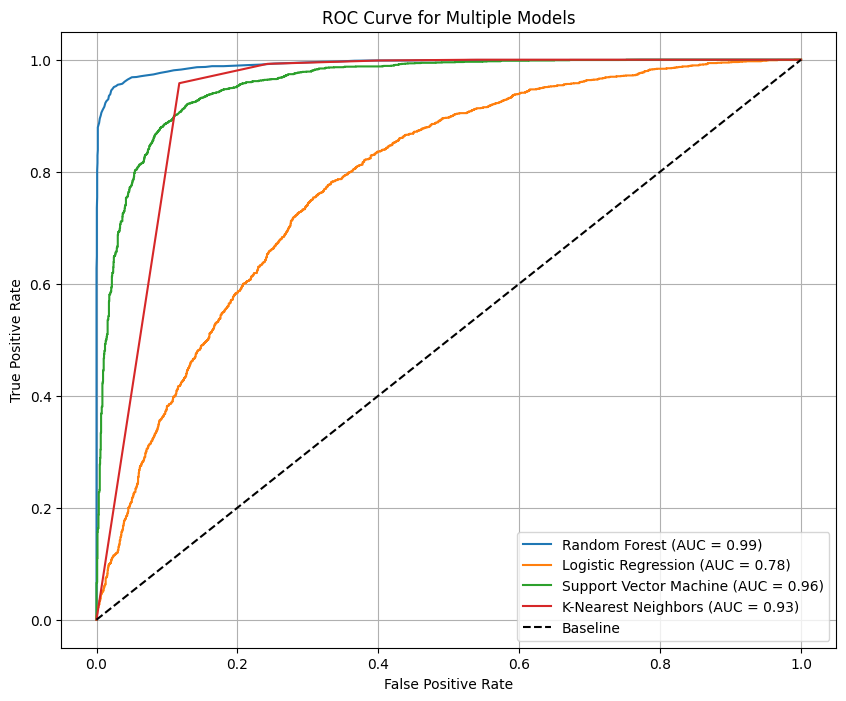

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize


# 5. Définition des modèles à tester
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42, probability=True),  # Important: probability=True pour SVM
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialisation de la figure pour les courbes ROC
plt.figure(figsize=(10, 8))

# Boucle pour entraîner et afficher les courbes ROC pour chaque modèle
for model_name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)

    # Prédictions des probabilités (la classe positive, donc colonne 1)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # Pour SVM sans predict_proba, utiliser la fonction decision_function
        y_pred_proba = model.decision_function(X_test_scaled)

    # Calcul de la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calcul de l'aire sous la courbe (AUC)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Tracer la courbe ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Affichage de la courbe diagonale (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

# Titrage et légendes
plt.title('ROC Curve for Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Affichage de la courbe
plt.show()


# Meilleur modèle Ramdom Forest

In [ ]:
# 6. Modélisation (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques F1 Score et Accuracy
f1 = f1_score(y_test, y_pred, average='weighted')  # ou 'macro', 'micro', selon ton cas
accuracy = accuracy_score(y_test, y_pred)

# Affichage des résultats
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification complet
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


F1 Score: 0.9629933771973882
Accuracy: 0.9629972247918593
Confusion Matrix:
[[2100   53]
 [ 107 2064]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2153
         1.0       0.97      0.95      0.96      2171

    accuracy                           0.96      4324
   macro avg       0.96      0.96      0.96      4324
weighted avg       0.96      0.96      0.96      4324



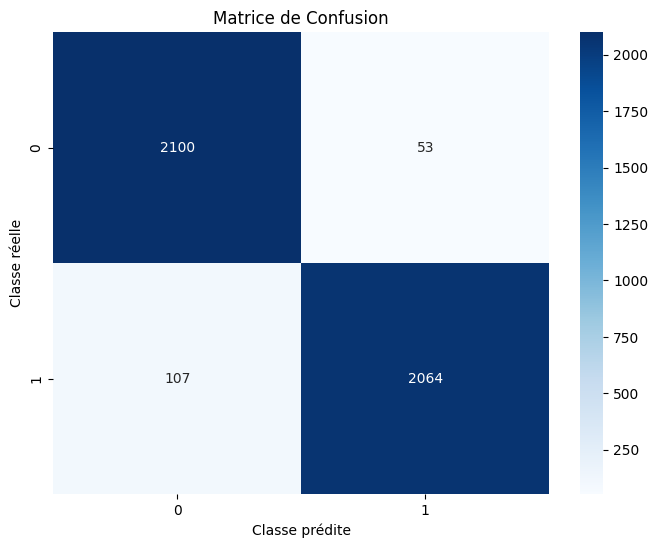

In [ ]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier

# Assuming you want to use a RandomForestClassifier as your stacking model
stacking_model = RandomForestClassifier(random_state=42) # Defining the stacking_model variable

# Fit the stacking model (assuming you have defined the model and data)
stacking_model.fit(X_train, y_train) # Added this line to fit the model

# Prédictions du modèle sur les données de test
y_pred = stacking_model.predict(X_test)

# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Matrice de Confusion")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

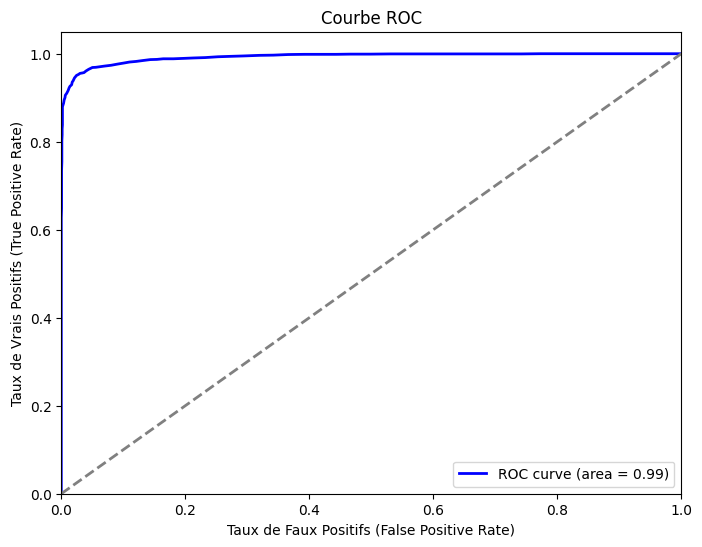

AUC: 0.99


In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédictions des probabilités pour la classe positive (présence de bactériémie)
y_prob = stacking_model.predict_proba(X_test)[:, 1]  # Prédiction des probabilités pour la classe 1 (bactériémie)

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcul de l'AUC
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Courbe aléatoire (diagonale)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")
